# Exploração dos dados

Imports

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets:

In [83]:
trainDf = pd.read_csv('training_data.csv')
testDf = pd.read_csv('test_data.csv')

Basic info for the training dataset:

In [84]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


Are there any null values?

In [85]:
trainDf.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

Are there duplicated values:

In [86]:
trainDf[trainDf.duplicated()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents


In [87]:
testDf[testDf.duplicated()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain


Analisis of each feature

In [88]:
print(trainDf['city_name'].value_counts())

Guimaraes    5000
Name: city_name, dtype: int64


In [89]:
print(trainDf['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


In [90]:
print(trainDf['magnitude_of_delay'].value_counts())

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64


In [91]:
print(trainDf['avg_rain'].value_counts())

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64


In [92]:
print(trainDf['luminosity'].value_counts())

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64


In [93]:
uniqueRoad = {}

for roads in trainDf["affected_roads"]:   
    for road in str(roads).split(","):
        if uniqueRoad.get(road) == None:
            uniqueRoad[road] = 1
        else:
            uniqueRoad[road] +=1

print(uniqueRoad)

{'': 2968, 'N101': 23460, 'R206': 327, 'N105': 2155, 'N206': 174, 'N309': 199, 'IC5': 108, 'nan': 85, 'N310': 17, 'N207-4': 22, 'IC5 - N206': 1, 'EM579': 16}


count     5000.000000
mean       560.567000
std       1686.859581
min          0.000000
25%          0.000000
50%          0.000000
75%        234.000000
max      31083.000000
Name: delay_in_seconds, dtype: float64

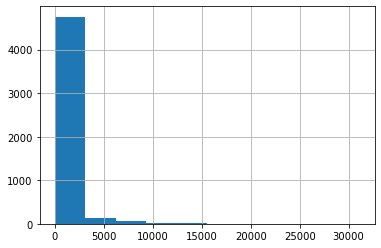

In [94]:
trainDf["delay_in_seconds"].hist()
trainDf["delay_in_seconds"].describe()

count    5000.000000
mean       14.583000
std         4.820514
min         1.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        35.000000
Name: avg_temperature, dtype: float64

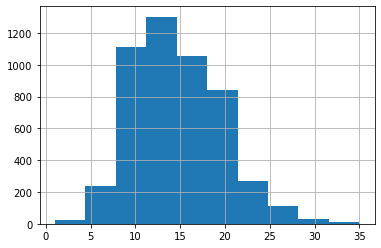

In [95]:
trainDf["avg_temperature"].hist()
trainDf["avg_temperature"].describe()

count    5000.000000
mean     1018.145000
std         5.174372
min       997.000000
25%      1015.000000
50%      1019.000000
75%      1022.000000
max      1032.000000
Name: avg_atm_pressure, dtype: float64

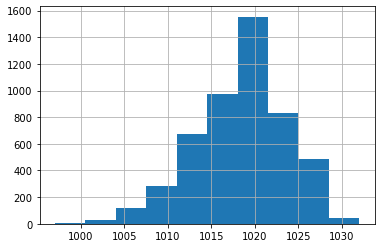

In [96]:
trainDf["avg_atm_pressure"].hist()
trainDf["avg_atm_pressure"].describe()

count    5000.000000
mean       74.455000
std        17.204638
min         6.000000
25%        63.000000
50%        78.000000
75%        90.000000
max       100.000000
Name: avg_humidity, dtype: float64

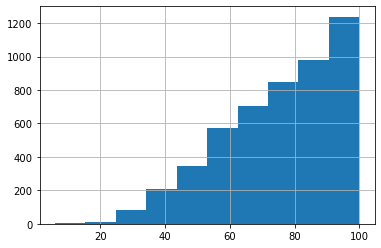

In [97]:
trainDf["avg_humidity"].hist()
trainDf["avg_humidity"].describe()

Basic treatment

In [98]:
replace_Incident= {'incidents':{'None':0, 'Low':1, 'Medium':2,'High':3,'Very_High':4}}
replace_AvgRain = {'avg_rain':{'Sem Chuva':0, 'chuva fraca':1, 'chuva moderada':2,'chuva forte':3}}
replace_Lumi    = {'luminosity': {'DARK':0,'LOW_LIGHT':1,'LIGHT':2,}}
replace_Magnitude = {'magnitude_of_delay':{'UNDEFINED':0,'MODERATE':1,'MAJOR':2}}

trainDf.replace(replace_Magnitude,inplace=True)
trainDf.replace(replace_Incident,inplace=True)
trainDf.replace(replace_AvgRain,inplace=True)
trainDf.replace(replace_Lumi,inplace=True)

It is possible to see that the delay, scales with the incidents classification and most other features, dont scale or have inconsistent values

In [99]:
trainDf.groupby(["incidents"]).mean()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain
incidents,,,,,,,,,
0,0.023176,10.324951,0.644970,13.893491,1018.893984,77.119329,1.132643,0.0,0.035010
1,0.172702,202.661560,1.199164,15.051532,1018.768802,72.330084,1.266017,0.0,0.061281
2,0.228374,226.910035,0.991349,14.306228,1018.500000,74.939446,1.351211,0.0,0.058824
3,0.304753,397.197577,1.060578,14.854613,1016.687791,73.427773,1.305219,0.0,0.061510
4,1.217247,3447.824212,1.585406,16.126036,1017.135987,69.388060,1.459370,0.0,0.102819


In [100]:
trainDf.groupby(["incidents"]).median()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain
incidents,,,,,,,,,
0,0.0,0.0,0.0,14.0,1019.0,82.0,1.0,0.0,0.0
1,0.0,136.5,2.0,14.0,1019.0,74.0,1.0,0.0,0.0
2,0.0,0.0,1.0,14.0,1018.5,80.0,1.0,0.0,0.0
3,0.0,0.0,2.0,14.0,1018.0,77.0,1.0,0.0,0.0
4,2.0,2479.0,2.0,15.0,1018.0,71.0,1.0,0.0,0.0


The mean classification of incidents, by the avg_temperature feature

<AxesSubplot:xlabel='avg_temperature'>

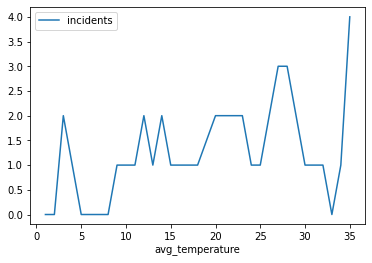

In [101]:
trainDf.groupby(["avg_temperature"]).median()[["incidents"]].plot()

The mean classification of incidents, by the avg_rain feature

<AxesSubplot:xlabel='avg_rain'>

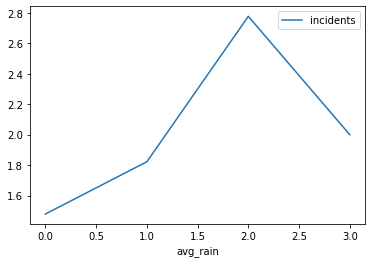

In [102]:
trainDf.groupby(["avg_rain"]).mean()[["incidents"]].plot()

The mean classification of incidents, by the delay in seconds feature

<AxesSubplot:xlabel='delay_in_seconds'>

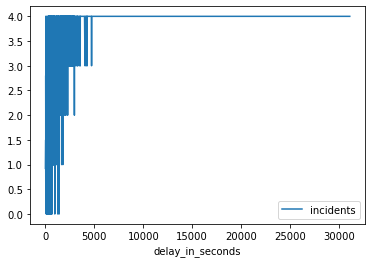

In [103]:
trainDf.groupby(["delay_in_seconds"]).mean()[["incidents"]].plot()

Catplot of the incidents rate by the magnitude of the delay

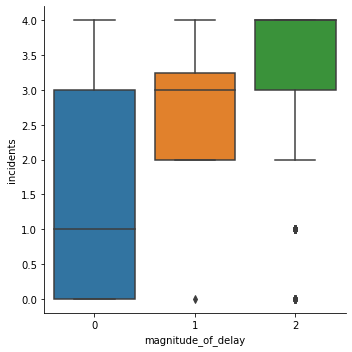

In [104]:
sns.catplot(y="incidents",x="magnitude_of_delay",data=trainDf,kind="box",)

Basic date treatment

In [105]:
trainDf['record_date'] = pd.to_datetime(trainDf['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
#Separate month
trainDf['record_date_month'] = trainDf['record_date'].dt.month


#Separate day
trainDf['record_date_day'] = trainDf['record_date'].dt.day

trainDf["dayYear"] = trainDf['record_date'].dt.dayofyear

#Separate hour
trainDf['record_date_hour'] = trainDf['record_date'].dt.hour


from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
#scale delay in seconds:
minMax.fit(trainDf[["delay_in_seconds"]])

trainDf["delay_in_seconds"] = minMax.transform(trainDf[["delay_in_seconds"]]) * 100


Graph of the delay in seconds and incidents classification based on day of month

<AxesSubplot:xlabel='record_date_day'>

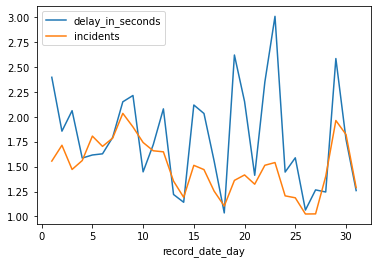

In [106]:
trainDf.drop(labels=["avg_rain","avg_temperature","avg_humidity","avg_atm_pressure","avg_wind_speed","magnitude_of_delay","luminosity","avg_precipitation","record_date_month","dayYear","record_date_hour"],axis=1).groupby(by="record_date_day").mean().plot()

Graph of the delay in seconds and incidents classification based on day of Year

<AxesSubplot:xlabel='dayYear'>

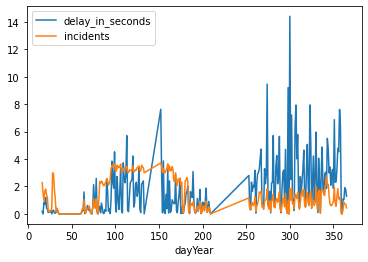

In [107]:
trainDf.drop(labels=["avg_rain","avg_temperature","magnitude_of_delay","avg_humidity","avg_atm_pressure","avg_wind_speed","avg_precipitation","record_date_month","luminosity","record_date_day","record_date_hour"],axis=1).groupby(by="dayYear").mean().plot()

Graph of the avg_temperature and incidents classification based on day of month

<AxesSubplot:xlabel='dayYear'>

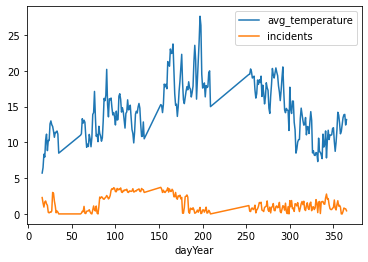

In [108]:
trainDf.drop(labels=["avg_rain","magnitude_of_delay","avg_humidity","avg_atm_pressure","avg_wind_speed","delay_in_seconds","avg_precipitation","record_date_month","luminosity","record_date_day","record_date_hour"],axis=1).groupby(by="dayYear").mean().plot()

Graph of the avg_rain and incidents classification based on day of month

<AxesSubplot:xlabel='dayYear'>

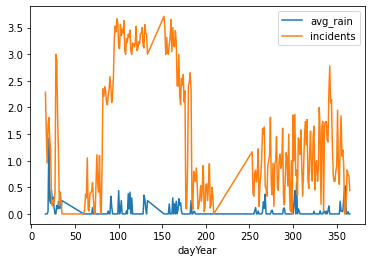

In [109]:
trainDf.drop(labels=["avg_temperature","magnitude_of_delay","avg_humidity","avg_atm_pressure","avg_wind_speed","delay_in_seconds","avg_precipitation","record_date_month","luminosity","record_date_day","record_date_hour"],axis=1).groupby(by="dayYear").mean().plot()

Graph of the delay_in_seconds, luminosity and incidents classification based on the hour of the day

<AxesSubplot:xlabel='record_date_hour'>

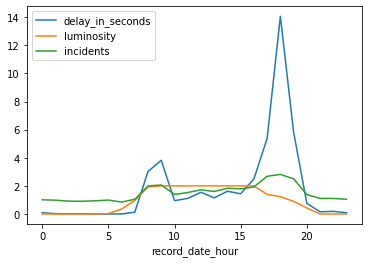

In [110]:
trainDf.drop(labels=["magnitude_of_delay","avg_rain","dayYear","avg_temperature","avg_humidity","avg_atm_pressure","avg_wind_speed",	"avg_precipitation","record_date_month","record_date_day"],axis=1).groupby(by="record_date_hour").mean().plot()

Graph of the delay in seconds and incidents classification based on the month

<AxesSubplot:xlabel='record_date_month'>

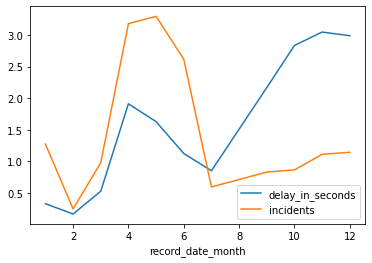

In [111]:
trainDf.drop(labels=["avg_rain","luminosity","avg_temperature","avg_humidity","avg_atm_pressure","avg_wind_speed","dayYear","magnitude_of_delay"	,"avg_precipitation","record_date_day","record_date_hour"],axis=1).groupby(by="record_date_month").mean().plot()

Correlation Matrix

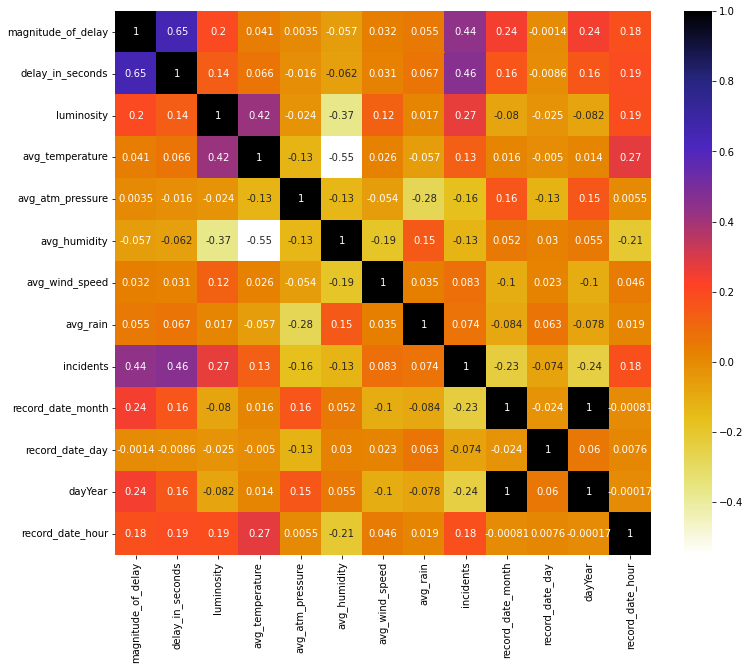

In [112]:
cor = trainDf.drop(labels=["avg_precipitation"],axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()